In [1]:
import sys
sys.path.append("../../")

In [2]:


import numpy as np
import math as m
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False, #mettere true quando ho latex
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.Cosmology.distances import Dc

# Import pandas
#import pandas as pd

**Compute cosmological distances**

In this exercise you will keep practicing integration in a cosmological context. In particular you will compute cosmological distances.

The basis to compute distances is the Hubble function 
, which describes the evolution of the backgroud.

for flat 
$\Lambda$ CDM cosmology it reads:

$$
N = \int_{0}^{z} \frac{c}{H(z')} \,dz
$$
 

Implement this function, or try your favourite cosmological model!

In [3]:
# Implement your favourite Hubble function
def hubble_function(z,omega_mat,omega_rad,w,H0):
    
    return H0*m.sqrt(omega_mat*(1+z)**3 + omega_rad*(1+z)**4 + (1 - omega_mat - omega_rad)*(1+z)**(3*(1+w)))

In [4]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented
z=1
omega_mat = 0.319
omega_rad = 0
w = -1
H0=67
get_distances = Dc(hubble_function,z,omega_mat,omega_rad,w,H0)
#print(get_distances)

In [5]:
# Comoving distance at z=1
print(get_distances, "Mpc")

2024-03-11 08:53:18.433469 :: pyACC.CosmologicalDistances  :: 3418.040545450445 Mpc


In [6]:
# array of redshifts
#z_list = np.linspace(0, 2, 100) #(0.0001, 2.5, 100)
z_list = np.arange(0, 2, 0.01) + 0.01/2


#array of comoving_distance: com_dist_list
comoving_distance =[]
comoving_distance_w =[]
angular_diameter_distance=[]
luminosity_distance =[]
distance_modulus=[]
n=0
f1 = open("comoving_distances.txt","w")
'''
f1.write("RedShift(z)" + " ")
f1.write("LCDM" + "                      ")
f1.write("wCDM" + " ")
    '''


# Calculate the comoving distance at each redshift in z_list
for z_prime in z_list:
    comoving_distance.append(Dc(hubble_function,z_prime,omega_mat,omega_rad,w,H0))
    comoving_distance_w.append(Dc(hubble_function,z_prime,omega_mat,omega_rad,-1.1,H0))
    f1.write(str(round(z_prime, 3)) + "  ")
    f1.write(str(comoving_distance[n]) + "  ")
    f1.write(str(comoving_distance_w[n]) + "  ")
    f1.write("\n")
    n=n+1

    #print(len(z_list)

f1.close()

'''
# Apri un file in modalità scrittura
with open('comoving_distances.txt', 'w') as file:
    # Stampare qualcosa nel file
    for i in range(0,len(z_list),1):
        print(z_prime,comoving_distance[i],comoving_distance_w[i])

# Il file si chiude automaticamente quando esce dal blocco 'with'
'''





# Calculate the angular diameter distance at each redshift in z_list
for i in range(0,len(z_list),1):
    angular_diameter_distance.append(comoving_distance[i]/(1+z_list[i]))
    #print(angular_diameter_distance[i])
    #print(i)

# Calculate the luminosity distance at each redshift in z_list
for i in range(0,len(z_list),1):
    luminosity_distance.append(comoving_distance[i]*(1+z_list[i]))

# Calculate the distance modulus at each redshift in z_list
for i in range(0,len(z_list),1):
    distance_modulus.append(5*m.log10(luminosity_distance[i]*10**5))

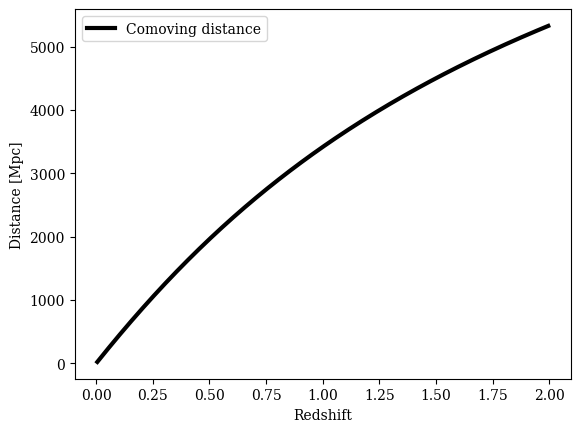

In [7]:
plt.plot(z_list, comoving_distance, lw=3, color="k", label="Comoving distance")

plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

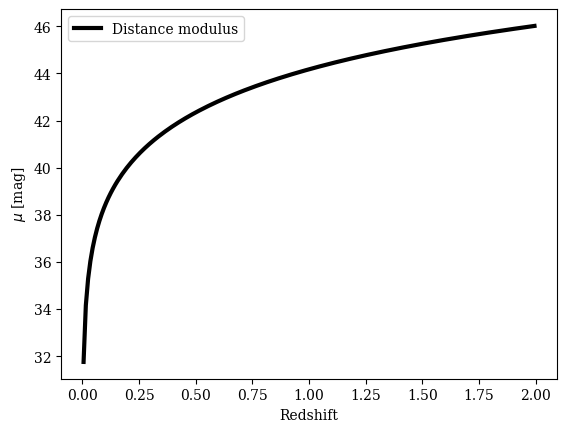

In [8]:
plt.plot(z_list, distance_modulus, lw=3, color="k", label="Distance modulus")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");

**Compare against experimental data**

Let's plot the SNIa distance moduli from Pantheon+ analysis against your favourite cosmological model.

Check out the paper. Data are stored here. Try to understand which table you should use for the plot.

In [9]:
# Read the data from Pantheon+ set. 
# Suggestion #1: pandas
# Suggestion #2: read the documentation to understand which column you should pick

In [10]:
plt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)
plt.errorbar(.., ..., ..., fmt="o", color="0.5", alpha=0.5, label="Pantheon+")

plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")

SyntaxError: invalid syntax (642659748.py, line 2)